
# Assignment 9: Implementation of K - Nearest Neighbors (KNN) Classification

Objective:
Use the KNN algorithm to classify iris species based on Sepal Length and Petal Length using different values of K and distance metrics.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Simulated Iris dataset
iris_df = pd.read_csv('Datasets/Iris.csv')
X = iris_df.iloc[:, :-1].values
y = iris_df.iloc[:, -1].values
iris_df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [3]:
# Introduce missing values in 10% of each numeric column
for col in ['SepalLengthCm', 'PetalLengthCm']:
    iris_df.loc[iris_df.sample(frac=0.1).index, col] = np.nan

In [4]:
iris_df.isnull().sum()

Id                0
SepalLengthCm    15
SepalWidthCm      0
PetalLengthCm    15
PetalWidthCm      0
Species           0
dtype: int64

In [5]:
# Fill missing values with column mean
iris_df.fillna(iris_df.mean(numeric_only=True), inplace=True)

In [6]:
# Encode Species labels
le = LabelEncoder()
iris_df['Species'] = le.fit_transform(iris_df['Species'])
iris_df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5       1.400000           0.2        0
1   2            4.9           3.0       3.768148           0.2        0
2   3            4.7           3.2       1.300000           0.2        0
3   4            4.6           3.1       1.500000           0.2        0
4   5            5.0           3.6       1.400000           0.2        0

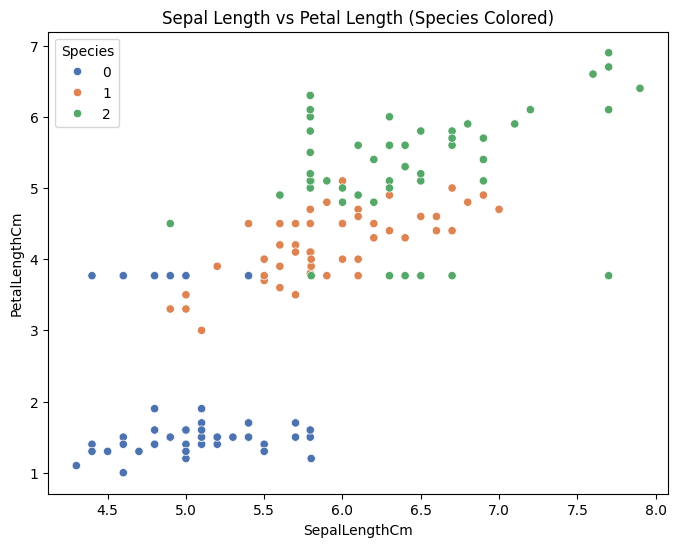

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_df, x='SepalLengthCm', y='PetalLengthCm', hue=iris_df['Species'], palette='deep')
plt.title("Sepal Length vs Petal Length (Species Colored)")
plt.show()

In [12]:
X = iris_df[['SepalLengthCm', 'PetalLengthCm']]
y = iris_df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k=5   #Change value of k to 3 and 5
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [13]:
# Convert numerical labels back to original species names
species_names = le.inverse_transform(y_test)
predicted_names = le.inverse_transform(y_pred)

comparison_df = pd.DataFrame({
    'SepalLength': X_test['SepalLengthCm'].values,
    'PetalLength': X_test['PetalLengthCm'].values,
    'Actual Species': species_names,
    'Predicted Species': predicted_names
})

# Display the results
print(comparison_df)

    SepalLength  PetalLength   Actual Species Predicted Species
0      6.100000     3.768148  Iris-versicolor   Iris-versicolor
1      5.700000     1.700000      Iris-setosa       Iris-setosa
2      7.700000     6.900000   Iris-virginica    Iris-virginica
3      6.000000     4.500000  Iris-versicolor   Iris-versicolor
4      6.800000     4.800000  Iris-versicolor   Iris-versicolor
5      5.400000     1.500000      Iris-setosa       Iris-setosa
6      5.600000     3.600000  Iris-versicolor   Iris-versicolor
7      6.900000     5.100000   Iris-virginica   Iris-versicolor
8      6.200000     4.500000  Iris-versicolor   Iris-versicolor
9      5.800000     3.900000  Iris-versicolor   Iris-versicolor
10     6.500000     5.100000   Iris-virginica    Iris-virginica
11     4.800000     1.400000      Iris-setosa       Iris-setosa
12     5.500000     1.300000      Iris-setosa       Iris-setosa
13     4.900000     1.500000      Iris-setosa       Iris-setosa
14     5.100000     1.500000      Iris-s

In [14]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [15]:
##Additional

for metric in ['manhattan', 'minkowski']:
    print(f"\n--- Using {metric.capitalize()} Distance ---")
    knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



--- Using Manhattan Distance ---
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  2  9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      1.00      0.90         9
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30


--- Using Minkowski Distance ---
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

